# Distribution of Velocity and Entropy Production
Simulation results for the velocity and the entropy production of a kinesin motor. The rate constants for the six-state model are from Liepelt and Lipowsky (2007) for chemical concentrations [AT P] = [ADP] = [P] = 1 μM, stepping size l = 8 nm and an external load force F = 1 pN. 10 000 trajectories have been sampled for each model with a simulation time τ = 1200 s.

In [1]:
import numpy as np

from matplotlib import pyplot as plt
import math

import time
import random
import networkx as nx
import os

import sys
path='Bibliotheken/'
res2 = os.listdir(path)
print(res2)
sys.path.append(path)

import Steady_State_Calculation_Spanning_Trees as auto
import Kinesin_Parameters as Kinesin
import PDF_Flux_entropy as PDF
import Analytic_Quantities as analytic

['Steady_State_Calculation_Spanning_Trees.py', 'Kinesin_Parameters.py', 'Analytic_Quantities.py', 'PDF_Flux_entropy.py', '__pycache__']


In [2]:
path='Fig4_simulation_Kinesin_force=1pN'
if not os.path.isdir(path):
    os.makedirs(path)

[w, w1] =Kinesin.Kinesin(force=1.e-12)

#calculate steady-state
G=auto.Matrix2Graph(w)
p=auto.steady_state(G)
print(p)

[9.84661814e-01 8.15695405e-06 8.26721580e-06 1.13982003e-03
 7.04334417e-03 7.13859798e-03]


# Which transitions have minimal contribution to entropy production?

In [3]:
i=1
A12=analytic.affinity(matrix=w, p=p, state1=1-i, state2=2-i)
A23=analytic.affinity(matrix=w, p=p, state1=2-i, state2=3-i)
A34=analytic.affinity(matrix=w, p=p, state1=3-i, state2=4-i)
A45=analytic.affinity(matrix=w, p=p, state1=4-i, state2=5-i)
A56=analytic.affinity(matrix=w, p=p, state1=5-i, state2=6-i)
A61=analytic.affinity(matrix=w, p=p, state1=6-i, state2=1-i)
A25=analytic.affinity(matrix=w, p=p, state1=2-i, state2=5-i)

J12=w[1-i][2-i]*p[1-i]-w[2-i][1-i]*p[2-i]
J25=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
J34=w[3-i][4-i]*p[3-i]-w[4-i][3-i]*p[4-i]
print('entropy contribution')
print('forward cycle')
print('1->2 ' +str(A12*J12))
print('5->6 ' +str(A56*J12))
print('6->1 ' +str(A61*J12))
print('mechanical tansition')
print('2->5 ' +str(A25*J25))
print('backward cycle')
print('2->3 ' +str(A23*J34))
print('3->4 ' +str(A34*J34))
print('4->5 ' +str(A45*J34))

entropy contribution
forward cycle
1->2 10.278492540395685
5->6 10.290572462625734
6->1 5.730046199903426
mechanical tansition
2->5 7.051698938284271
backward cycle
2->3 0.011917605358453416
3->4 0.006636716331062018
4->5 0.034451818947115444


### Transitions with minimal contribution to entropy production
In forward cycle transition 6->1,
in backward cycle transition 3->4 
has the minimal contribution to entropy production.

In [4]:
# coarse graining 
# I start counting from 0

i=1
#copying
wcg1=w
#print(w_copy)
#sclicing: delete 3+1 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg1=  np.delete(wcg1, 3, 0)
#print(wcg1)
wcg1=np.delete(wcg1, 3, 1) #delete 3+1 th column (dim=1)
#print(wcg1)
# new rates
wcg1[3-i][2-i]=w[3-i][2-i]*p[3-i]/(p[3-i]+p[4-i])
wcg1[3-i][4-i]=w[4-i][5-i]*p[4-i]/(p[3-i]+p[4-i])
wcg1[4-i][3-i]=w[5-i][4-i]
print()
#print(wcg1)
Gcg1=auto.Matrix2Graph(wcg1)
pcg1=auto.steady_state(Gcg1)
print(pcg1)
print(p)
P_6state=analytic.entropyProduction(matrix=w, p=p)
P_5state=analytic.entropyProduction(matrix=wcg1, p=pcg1)
print(P_5state)
print(P_6state-P_5state)

print()
print('flux in tri-cyclic 5-state modekl')
flux_5state=wcg1[2-i][4-i]*pcg1[2-i]-wcg1[4-i][2-i]*pcg1[4-i]
print(flux_5state)
print('flux in tri-cyclic 6-state modekl')
flux_6state=w[2-i][5-i]*p[2-i]-w[5-i][2-i]*p[5-i]
print(flux_6state)

#copying
wcg2=wcg1
print(wcg2)
#sclicing: delete 5 th row (dim=0)
#numpy.delete(arr, obj, axis=None)
wcg2=  np.delete(wcg2, 5-1, 0)
#print(wcg2)
wcg2=np.delete(wcg2, 5-1, 1) #delete 5 th column (dim=1)
#print(wcg2)
# new rates
wcg2[1-i][2-i]=(wcg1[1-i][2-i]*pcg1[1-i])/(pcg1[1-i]+pcg1[5-i])
wcg2[1-i][4-i]=wcg1[5-i][4-i]*pcg1[5-i]/(pcg1[1-i]+pcg1[5-i])
wcg2[4-i][1-i]=wcg1[4-i][5-i]
print()
#print(wcg2)
Gcg2=auto.Matrix2Graph(wcg2)
pcg2=auto.steady_state(Gcg2)
print(pcg2)
print(pcg1)
P_4state=analytic.entropyProduction(matrix=wcg2, p=pcg2)
print(P_4state)
print((P_5state-P_4state)/P_5state)

print()
print('flux in tri-cyclic 4-state modekl')
flux_4state=wcg2[2-i][4-i]*pcg2[2-i]-wcg2[4-i][2-i]*pcg2[4-i]
print(flux_4state)
print(flux_5state)


[9.84661814e-01 8.15695405e-06 1.14808724e-03 7.04334417e-03
 7.13859798e-03]
[9.84661814e-01 8.15695405e-06 8.26721580e-06 1.13982003e-03
 7.04334417e-03 7.13859798e-03]
P1=dS/dt= 8.411674135011538e-15
P2(copling to set of thermodynamic forces)= 33.403816281845735
P1=dS/dt= -1.2871648191747909e-15
P2(copling to set of thermodynamic forces)= 33.39717956551469
33.39717956551469
0.006636716331051673

flux in tri-cyclic 5-state modekl
1.3361344681319691
flux in tri-cyclic 6-state modekl
1.3361344681319687
[[0.00000000e+00 1.35914641e+00 0.00000000e+00 0.00000000e+00
  1.90008325e-02]
 [7.55081338e+01 0.00000000e+00 1.90008325e+02 1.64643491e+05
  0.00000000e+00]
 [0.00000000e+00 6.15700527e-04 0.00000000e+00 1.34935938e+00
  0.00000000e+00]
 [0.00000000e+00 9.73247992e-01 4.83252056e-11 0.00000000e+00
  1.90008325e+02]
 [1.90008325e+02 0.00000000e+00 0.00000000e+00 8.55037463e-02
  0.00000000e+00]]

[9.91800412e-01 8.15695405e-06 1.14808724e-03 7.04334417e-03]
[9.84661814e-01 8.15695405e

### Analytic quantities

In [5]:
normierung=auto.Normfactor(G)
print('forward cycle F')
zuflussF=(w1[4][5]*w1[3][2]+w1[3][4]*w1[4][5]+w1[4][3]*w1[3][2])
JF_plus=w1[1][2]*w1[2][5]*w1[5][6]*w1[6][1]*zuflussF/normierung
JF_minus=w1[1][6]*w1[6][5]*w1[5][2]*w1[2][1]*zuflussF/normierung
print([JF_plus, JF_minus])
print(zuflussF/normierung)
print()

print('backward cycle B')
zuflussB=(w1[1][2]*w1[6][5]+w1[6][1]*w1[1][2]+w1[1][6]*w1[6][5])
JB_plus=w1[2][3]*w1[3][4]*w1[4][5]*w1[5][2]*zuflussB/normierung
JB_minus=w1[2][5]*w1[5][4]*w1[4][3]*w1[3][2]*zuflussB/normierung
print([JB_plus, JB_minus])
print(zuflussB/normierung)
print()

print('dissipative cycle D')
zuflussD=1.0
JD_plus=w1[1][2]*w1[2][3]*w1[3][4]*w1[4][5]*w1[5][6]*w1[6][1]*zuflussD/normierung
JD_minus=w1[1][6]*w1[6][5]*w1[5][4]*w1[4][3]*w1[3][2]*w1[2][1]*zuflussD/normierung
print([JD_plus, JD_minus])
print(zuflussD/normierung)
print()

print('mean and variance for 1200 s')
print(JF_plus-JF_minus-JB_plus+JB_minus)
print((JF_plus+JF_minus+JB_plus+JB_minus)/12e2)

#Entropyproduction
J12=w1[1][2]*p[1-1]-w1[2][1]*p[2-1]
J23=w1[2][3]*p[2-1]-w1[3][2]*p[3-1]
DeltaS_F=np.log(w1[1][2]*w1[2][5]*w1[5][6]*w1[6][1])-np.log(w1[1][6]*w1[6][5]*w1[5][2]*w1[2][1])
DeltaS_B=np.log(w1[2][3]*w1[3][4]*w1[4][5]*w1[5][2])-np.log(w1[2][5]*w1[5][4]*w1[4][3]*w1[3][2])
P=J12*DeltaS_F+J23*DeltaS_B
print(P)

forward cycle F
[1.3361423664164356, 1.9745661803217997e-11]
1.6538520984503306e-10

backward cycle B
[7.898264721287198e-06, 2.1378277862662965e-18]
1.6538520984503306e-10

dissipative cycle D
[0.0015412840328531269, 6.165136131412507e-27]
6.401174670719003e-13

mean and variance for 1200 s
1.3361344681319685
0.001113458553917419
33.40381628184575


In [6]:
#Varianz Entropieproduktion
def stat_P(time, w1, p):
    J12=w1[1][2]*p[1-1]-w1[2][1]*p[2-1]
    J23=w1[2][3]*p[2-1]-w1[3][2]*p[3-1]
    DeltaS_F=np.log(w1[1][2]*w1[2][5]*w1[5][6]*w1[6][1])-np.log(w1[1][6]*w1[6][5]*w1[5][2]*w1[2][1])
    DeltaS_B=np.log(w1[2][3]*w1[3][4]*w1[4][5]*w1[5][2])-np.log(w1[2][5]*w1[5][4]*w1[4][3]*w1[3][2])
    print('Affinities')
    print([DeltaS_F, DeltaS_B])
    P=J12*DeltaS_F+J23*DeltaS_B
    print(P)
    term1=(JF_plus+JF_minus+JD_plus+JD_minus)*(DeltaS_F/time)*(DeltaS_F)
    term2=(JB_plus+JB_minus+JD_plus+JD_minus)*(DeltaS_B/time)*(DeltaS_B)
    var=term1+term2
    print(var)
    return P, var

#Geschwindikgeit 
def stat_velo(time, w1, p):
    print('mean and variance of velocity')
    # indices mit null startend
    velo=w[1][4]*p[1]-w[4][1]*p[4]
    print(velo)
    var_velo=(JF_plus+JF_minus+JB_plus+JB_minus)/time
    print(var_velo)
    #calculate velocity variance with transition fluxes
    var_transition=(w[1][4]*p[1]+w[4][1]*p[4])/time
    print(var_transition)
    print('Difference between variances calculated with cycles and transition fluxes')
    print(var_velo-var_transition)
    return velo, var_velo

def gaussian(x, mu, sigma):
    return 1./(np.sqrt(2*3.1415)*sigma)*np.exp(-(x-mu)*(x-mu)/(2*sigma*sigma))

In [7]:
# Analytisch coarse grained 4 state model
CGnormierung=auto.Normfactor(Gcg2)
print('forward cycle F')
i=1
CGzuflussF=(wcg2[3-i][4-i]+wcg2[3-i][2-i])
CGJF_plus=wcg2[0][1]*wcg2[1][3]*wcg2[3][0]*CGzuflussF/CGnormierung
CGJF_minus=wcg2[1][0]*wcg2[0][3]*wcg2[3][1]*CGzuflussF/CGnormierung
print([CGJF_plus, CGJF_minus])
print(CGzuflussF/CGnormierung)
print()

print('backward cycle F')
CGzuflussB=(wcg2[0][1]+wcg2[0][3])
CGJB_plus=wcg2[1][2]*wcg2[2][3]*wcg2[3][1]*CGzuflussB/CGnormierung
CGJB_minus=wcg2[1][3]*wcg2[3][2]*wcg2[2][1]*CGzuflussB/CGnormierung
print([CGJB_plus, CGJB_minus])
print(CGzuflussB/CGnormierung)
print()

print('dissipative cycle D')
CGzuflussD=1.0
CGJD_plus=wcg2[0][1]*wcg2[1][2]*wcg2[2][3]*wcg2[3][0]*CGzuflussD/CGnormierung
CGJD_minus=wcg2[0][3]*wcg2[3][2]*wcg2[2][1]*wcg2[1][0]*CGzuflussD/CGnormierung
print([CGJD_plus, CGJD_minus])
print(CGzuflussD/CGnormierung)
print()

def stat_PCG(time, w1, p):
    i=1
    CGJ12=w1[1-i][2-i]*p[1-i]-w1[2-i][1-i]*p[2-i]
    CGJ23=w1[2-i][3-i]*p[2-i]-w1[3-i][2-i]*p[3-i]
    DeltaS_F=np.log(w1[0][1]*w1[1][3]*w1[3][0])-np.log(w1[0][3]*w1[3][1]*w1[1][0])
    DeltaS_B=np.log(w1[1][2]*w1[2][3]*w1[3][1])-np.log(w1[1][3]*w1[3][2]*w1[2][1])
    print('Affinities')
    print([DeltaS_F, DeltaS_B])
    P=CGJ12*DeltaS_F+CGJ23*DeltaS_B
    print(P)
    term1=(CGJF_plus+CGJF_minus+CGJD_plus+CGJD_minus)*(DeltaS_F/time)*(DeltaS_F)
    term2=(CGJB_plus+CGJB_minus+CGJD_plus+CGJD_minus)*(DeltaS_B/time)*(DeltaS_B)
    var=term1+term2
    print(var)
    return P, var

#Geschwindikgeit 
def stat_veloCG(time, wcg, pcg):
    i=1
    print('mean and variance of velocity')
    velo=wcg[2-i][4-i]*pcg[2-i]-wcg[4-i][2-i]*pcg[4-i]
    print(velo)
    var_velo=(CGJF_plus+CGJF_minus+CGJB_plus+CGJB_minus)/time
    print(var_velo)
    return velo, var_velo


forward cycle F
[1.3361423678265838, 1.4315203413719215e-09]
3.1652388457542855e-08

backward cycle F
[7.898263094635988e-06, 1.550585142025624e-16]
3.165248535544053e-08

dissipative cycle D
[0.0015412840344799312, 3.2418393539298297e-23]
2.3446646395509876e-08



### Simulation parameter

In [8]:
runtime=1200.0
Trajectories=10000
NoBINS=10

In [9]:
def pdf_data(matrix, time1, trajectories, NoBins, observable, node1, node2):
    start_time = time.time()
    if observable=='entropy':
        vec=PDF.pdf_entropy(Matrix=matrix, start=0, time=time1, runs=trajectories)
        print("--- %s seconds ---" % (time.time() - start_time))
    elif observable=='flux':
        start_time = time.time()
        vec=PDF.pdf_flux(Matrix=matrix, start=0, time=time1, runs=trajectories, state1=node1, state2=node2)
        print("--- %s seconds ---" % (time.time() - start_time))
    elif observable=='transition':
        start_time = time.time()
        [totalcounts, counts12, counts21, netcounts]=PDF.pdf_transition(Matrix=matrix, start=0, time=time1, runs=trajectories, state1=node1, state2=node2)
        vec=netcounts
        print("--- %s seconds ---" % (time.time() - start_time))

        
    vec=np.array(vec)
    MAX=np.max(vec)
    MIN=np.min(vec)
    print('maximum and minimum value')
    print([MAX, MIN])
    q75, q25 = np.percentile(vec, [75 ,25])
    iqr = q75 - q25
    n=len(vec)
    h=2*iqr/pow(n,0.3333333)
    NoBINS=int((MAX-MIN)/h)
    if observable=='transition' and time1 < 121:
        NoBINS=int(0.3*NoBINS)
        print('NoBins modified')
    print('Number of bins with Freedman-Diaconis rule')
    print(NoBINS)
    print('mean and variance')
    mean=np.mean(vec)
    var=np.var(vec)
    print([np.mean(vec), np.var(vec)])
    print
    [hist, bin_edges]=np.histogram(vec, density=True, bins=NoBINS)
    
    string2=path+'/'+str(len(matrix))+'-state-model_'+observable+'_time_'+str(int(time1))+'.dat'
    fh2=open(string2, 'w')
    for element in vec:
        fh2.write(str(element)+'\n')
    fh2.close()
    
    return [bin_edges[:-1], hist, mean, var]


def Sturge_Rule(matrix, observable, time1, anzahl):
    string2=path+'/'+str(len(matrix))+'-state-model_'+observable+'_time_'+str(int(time1))+'.dat'
    vec = np.loadtxt(string2)
    #vec=np.array(vec)
    MAX=np.max(vec)
    MIN=np.min(vec)
    print('maximum and minimum value')
    print([MAX, MIN])
    
    q75, q25 = np.percentile(vec, [75 ,25])
    iqr = q75 - q25
    n=len(vec)
    h=2*iqr/pow(n,0.3333333)
    NoBINS=int((MAX-MIN)/h)
    print('Number of bins with Freedman-Diaconis rule')
    print(NoBINS)
    
    #Sturge's law
    print('numer of trajctories')
    print(len(vec))
    NoBINS=int(np.log2(len(vec)))+1
    print('Number of bins with Sturge rule')
    print(NoBINS)
    
    NoBINS=anzahl
    
    
    print('mean and variance')
    mean=np.mean(vec)
    var=np.var(vec)
    print([np.mean(vec), np.var(vec)])
    print
    [hist, bin_edges]=np.histogram(vec, density=True, bins=NoBINS)
    
    return [bin_edges[:-1], hist, mean, var]

# Diese Zeile startet die Entropie Simulation neu

In [11]:
#Entropy in the original model
[x1,y1, P_m1, P_v1]=pdf_data(matrix=w, time1=runtime, trajectories=Trajectories, NoBins=NoBINS, observable='entropy', node1=2-1, node2=5-1)

#Entropy in step 1
[x1,y1, P_m1cg, P_v1cg]=pdf_data(matrix=wcg1, time1=runtime, trajectories=Trajectories, NoBins=NoBINS, observable='entropy', node1=2-1, node2=5-1)

#Entropy in step 2
[x1,y1, P_m1cg2, P_v1cg2]=pdf_data(matrix=wcg2, time1=runtime, trajectories=Trajectories, NoBins=NoBINS, observable='entropy', node1=2-1, node2=5-1)


--- 302.6558654308319 seconds ---
maximum and minimum value
[36.58553395227224, 30.798259823913074]
Number of bins with Freedman-Diaconis rule
56
mean and variance
[33.41011699627175, 0.6671091303079363]
--- 291.10432720184326 seconds ---
maximum and minimum value
[36.32569634501578, 30.25365918030606]
Number of bins with Freedman-Diaconis rule
59
mean and variance
[33.39885629621531, 0.6647202003499]
--- 214.46798515319824 seconds ---
maximum and minimum value
[30.24082545975924, 24.92285304841565]
Number of bins with Freedman-Diaconis rule
61
mean and variance
[27.655188757446187, 0.4796360339035009]


# Auswertung Entropie-Simulation

In [12]:
bli=20
[x_P,y_P, mean_P, var_P]=Sturge_Rule(matrix=w, observable='entropy', time1=runtime, anzahl=bli)
[x_Pcg1,y_Pcg1, mean_P1, var_P1]=Sturge_Rule(matrix=wcg1, observable='entropy', time1=runtime, anzahl=bli)
[x_Pcg2,y_Pcg2, mean_P2, var_P2]=Sturge_Rule(matrix=wcg2, observable='entropy', time1=runtime, anzahl=bli)

maximum and minimum value
[36.58553395227224, 30.798259823913074]
Number of bins with Freedman-Diaconis rule
56
numer of trajctories
10000
Number of bins with Sturge rule
14
mean and variance
[33.41011699627175, 0.6671091303079363]
maximum and minimum value
[36.32569634501578, 30.25365918030606]
Number of bins with Freedman-Diaconis rule
59
numer of trajctories
10000
Number of bins with Sturge rule
14
mean and variance
[33.39885629621531, 0.6647202003499]
maximum and minimum value
[30.24082545975924, 24.92285304841565]
Number of bins with Freedman-Diaconis rule
61
numer of trajctories
10000
Number of bins with Sturge rule
14
mean and variance
[27.655188757446187, 0.4796360339035009]


#### Check simualted and analytic mean and variance

In [14]:
# simulated
P_sim = mean_P
Pvar_sim = var_P
#analytical
P_ana, Pvar_ana = stat_P(time=runtime, w1=w1, p=p)

print()
print('simualted mean and variance ' + str([P_sim, Pvar_sim]))
print('analytical mean and variance ' + str([P_ana, Pvar_ana]))

Affinities
[24.9378739353686, 28.937873935368604]
33.40381628184575
0.6943328996579683

simualted mean and variance [33.41011699627175, 0.6671091303079363]
analytical mean and variance [33.40381628184575, 0.6943328996579683]


Affinities
[24.9378739353686, 28.937873935368604]
33.40381628184575
0.6943328996579683
Affinities
[20.65431541384264, 24.653861433125797]
27.66713336561126
0.4763320469294357


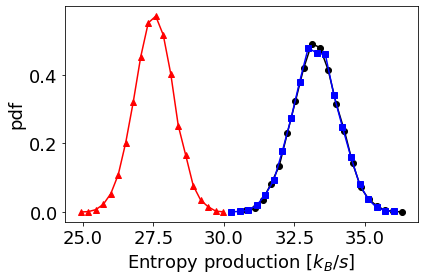

In [16]:
f_size = 18
fig, ax = plt.subplots()
ax.set_xlabel('Entropy production [$k_B$/$s$]', fontsize=f_size)
ax.set_ylabel('pdf', fontsize=f_size)
acc=4
ax.plot(x_P, y_P, '-ok', color='black', label='6-state model')
ax.plot(x_Pcg1, y_Pcg1, '-sk', color='blue', label='5-state model')
ax.plot(x_Pcg2, y_Pcg2,'-^k', color='red', label='4-state model')
ax.tick_params(axis='both', labelsize=f_size)
P_mean, P_var=stat_P(time=1200.0, w1=w1, p=p)
test_x=np.arange(1.4, 2.8, 0.001)
test_y=gaussian(x=test_x, mu=P_mean, sigma=np.sqrt(P_var))
P_meanCG, P_varCG=stat_PCG(time=1200.0, w1=wcg2, p=pcg2)
test_x=np.arange(1.4, 2.8, 0.001)
test_y=gaussian(x=test_x, mu=P_meanCG, sigma=np.sqrt(P_varCG))
fig.tight_layout()
fig.savefig(path+'/Simulation_entropy_prod_force=1ps.eps', bbox_inches = "tight")
plt.show()

# Simulation Transition counts -> flux or velocity

In [17]:
#with transition counts
#velocity in original model
[x1,y1, m1, v1]=pdf_data(matrix=w, time1=runtime, trajectories=Trajectories, NoBins=NoBINS, observable='transition', node1=2-1, node2=5-1)

#Velocity in step 1
[x1,y1, m1cg, v1cg]=pdf_data(matrix=wcg1, time1=runtime, trajectories=Trajectories, NoBins=NoBINS, observable='transition', node1=2-1, node2=4-1)

#Velocity in step 2
print(wcg2)
print(wcg2[2-1][4-1]*pcg2[2-1]-wcg2[4-1][2-1]*pcg2[4-1])
[x1,y1, m1cg2, v1cg2]=pdf_data(matrix=wcg2, time1=runtime, trajectories=Trajectories, NoBins=NoBINS, observable='transition', node1=2-1, node2=4-1)


--- 229.97918272018433 seconds ---
maximum and minimum value
[1.4683333333333333, 1.2116666666666667]
Number of bins with Freedman-Diaconis rule
62
mean and variance
[1.3364188333333333, 0.0010913094119722221]
--- 240.15001773834229 seconds ---
maximum and minimum value
[1.4608333333333334, 1.2191666666666667]
Number of bins with Freedman-Diaconis rule
58
mean and variance
[1.337318, 0.0010594627093333333]
[[0.00000000e+00 1.34936379e+00 0.00000000e+00 6.15423086e-04]
 [7.55081338e+01 0.00000000e+00 1.90008325e+02 1.64643491e+05]
 [0.00000000e+00 6.15700527e-04 0.00000000e+00 1.34935938e+00]
 [1.90008325e+02 9.73247992e-01 4.83252056e-11 0.00000000e+00]]
1.3361344681319685
--- 174.22990369796753 seconds ---
maximum and minimum value
[1.4691666666666667, 1.215]
Number of bins with Freedman-Diaconis rule
60
mean and variance
[1.3365525, 0.0011167847437500002]


# Auwertung Simulation Velocity

In [18]:
bli=15
[x_v,y_v, mean, var]=Sturge_Rule(matrix=w, observable='transition', time1=runtime, anzahl=bli)
[x_vcg1,y_vcg1, mean, var]=Sturge_Rule(matrix=wcg1, observable='transition', time1=runtime, anzahl=bli)
[x_vcg2,y_vcg2, mean, var]=Sturge_Rule(matrix=wcg2, observable='transition', time1=runtime, anzahl=bli)

maximum and minimum value
[1.4683333333333333, 1.2116666666666667]
Number of bins with Freedman-Diaconis rule
62
numer of trajctories
10000
Number of bins with Sturge rule
14
mean and variance
[1.3364188333333333, 0.0010913094119722221]
maximum and minimum value
[1.4608333333333334, 1.2191666666666667]
Number of bins with Freedman-Diaconis rule
58
numer of trajctories
10000
Number of bins with Sturge rule
14
mean and variance
[1.337318, 0.0010594627093333333]
maximum and minimum value
[1.4691666666666667, 1.215]
Number of bins with Freedman-Diaconis rule
60
numer of trajctories
10000
Number of bins with Sturge rule
14
mean and variance
[1.3365525, 0.0011167847437500002]


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


mean and variance of velocity
1.3361344681319687
0.001113458553917419
0.0011248702577201551
Difference between variances calculated with cycles and transition fluxes
-1.141170380273616e-05


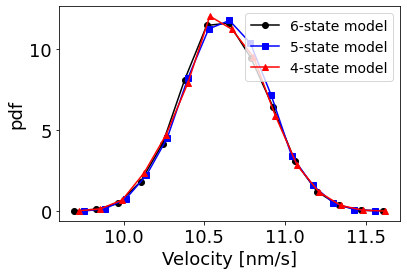

In [19]:
velo=w[1][4]*p[1]-w[4][1]*p[4]
fig, ax = plt.subplots()
ax.set_xlabel('Velocity [l/s] obtained by counting transitions per simulation time')
ax.set_xlabel('Velocity [nm/s]', fontsize=f_size)
ax.set_ylabel('pdf', fontsize=f_size)
l=8
ax.plot(l*np.array(x_v), y_v, '-ok', color='black', label='6-state model')
ax.plot(l*np.array(x_vcg1), y_vcg1, '-sk', color='blue', label='5-state model')
ax.plot(l*np.array(x_vcg2), y_vcg2, '-^k', color='red', label='4-state model')

#plot mean and variance
velo, var_velo=stat_velo(time=runtime, w1=w1, p=p)
sigma_velo=np.sqrt(var_velo)
mean=[velo, velo]
var2=[velo-sigma_velo, velo+sigma_velo]
ymax=y1=gaussian(x=velo, mu=velo, sigma=sigma_velo)
y_var1=[y1,y1]
y2=gaussian(x=velo+sigma_velo, mu=velo, sigma=sigma_velo)
y_var2=[y2, y2]
test_x=np.arange(0.08, 0.22, 0.001)
test_y=gaussian(x=test_x, mu=velo, sigma=sigma_velo)
test_x=np.arange(0.04, 0.32, 0.001)
#test_y=gaussian(x=test_x, mu=velo, sigma=np.sqrt(var/runtime1))
#ax.plot(test_x, test_y, color='blue')
ax.tick_params(axis='both', labelsize=f_size)
fig.tight_layout()
ax.legend(prop={'size': 14})
fig.savefig(path+'/2nd_Simulation_transition_counts_velocity_force=1pN.eps',bbox_inches='tight')
plt.show()

### analytic quantities

In [20]:
P6, P_var6 = stat_P(time=runtime, w1=w1, p=p)
v6, v_var6 = stat_velo(time=runtime, w1=w1, p=p)
print()
print('original model')
print('mean velocity '+str(v6))
print('std velocity '+str(np.sqrt(v_var6)))


Affinities
[24.9378739353686, 28.937873935368604]
33.40381628184575
0.6943328996579683
mean and variance of velocity
1.3361344681319687
0.001113458553917419
0.0011248702577201551
Difference between variances calculated with cycles and transition fluxes
-1.141170380273616e-05

original model
mean velocity 1.3361344681319687
std velocity 0.033368526397151835


### 4-state model analytic

In [21]:
CG2_P, CG2_P_var = stat_PCG(time=runtime, w1=wcg2, p=pcg2)

print()
CG2_v, CG2_v_var = stat_veloCG(time=runtime, wcg=wcg2, pcg=pcg2)
print()
print('4-state model')
print('mean velocity '+str(CG2_v))
print('std velocity '+str(np.sqrt(CG2_v_var)))

Affinities
[20.65431541384264, 24.653861433125797]
27.66713336561126
0.4763320469294357

mean and variance of velocity
1.3361344681319685
0.0011134585562676657

4-state model
mean velocity 1.3361344681319685
std velocity 0.03336852643236836


In [22]:
print('variances')
print(v_var6)
print(CG2_v_var)
diff_var_v=(v_var6-CG2_v_var)/v_var6
print(diff_var_v)

print()
print('standard dev')
std6=np.sqrt(v_var6)
CG2_std=np.sqrt(CG2_v_var)
print(std6)
print(CG2_std)
diff_std=(std6-CG2_std)/std6
print(diff_std)

variances
0.001113458553917419
0.0011134585562676657
-2.110762654857279e-09

standard dev
0.033368526397151835
0.03336852643236836
-1.0553814610253934e-09


In [23]:
print('rel difference of mean entropy production')
diff_P=(P6-CG2_P)/P6
print(diff_P)

rel difference of mean entropy production
0.17173735084132444


###  5-state model


In [26]:
CG1_P = analytic.entropyProduction(matrix=wcg1, p=pcg1)
print('entropy production in 5-state model '+str(CG1_P))

P1=dS/dt= -1.2871648191747909e-15
P2(copling to set of thermodynamic forces)= 33.39717956551469
entropy production in 5-state model 33.39717956551469


In [27]:
print('rel difference of mean entropy production between 6-state and 5-state')
diff_P2=(P6-CG1_P)/P6
print(diff_P2)

rel difference of mean entropy production between 6-state and 5-state
0.00019868138044651173
